In [1]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

In [2]:
require(xtable)

Loading required package: xtable

Warning message:
“package ‘xtable’ was built under R version 4.0.2”


The following function performs a Tukey transform on the dependent variable, for $\lambda = -10, -9.99, \dots, 9.99, 10$, and chooses the one which maximizes the correlation coefficient of $x$ and $\tilde{y}$

In [3]:
choose_lambda <- function(x,y){
    if (min(y) < 0){
        print("Error. Negative values")
        return(NaN)
    }
        
    cors <- numeric()
    lambdas <- seq(-10, 10, .01)
    
    for (i in lambdas){
        if (i == 0)
            cors <- c(cors, cor(x, log(y)))
        else if (i > 0)
            cors <- c(cors, cor(x, y**i))
        else
            cors <- c(cors, cor(x, -(y**i)))
    }

    return (lambdas[which.max(cors)])
}

We generate the independent variable $x$, and different dependent variables $y$ (linear, cuadratic, cubic, $\log$ and square root). We add noise to $y$, and then use our previous function and ```lm``` to try and fit a model for $y$ 

In [4]:
x <- sample(x = 100:500, size = 200, replace = FALSE)

In [5]:
y1 <- 5*x + 4

In [6]:
noise <- rnorm(length(x), mean=10, sd=80)

In [7]:
noisy.y1 <- y1 + noise

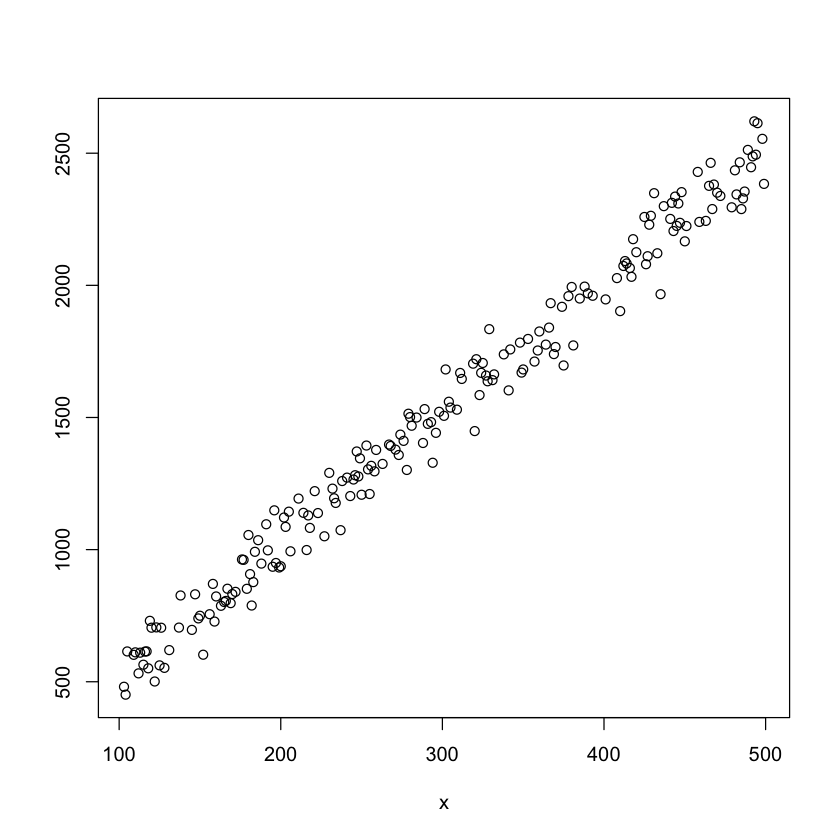

In [8]:
plot(x, noisy.y1, ylab="")

In [116]:
png(filename="x-y1.png", height=2000, width=2000, res=400)
plot(x, noisy.y1, ylab="y")
dev.off()

pdf 
  2

In [10]:
y2 <- 3*(x**2) + 50

In [11]:
noise2 <- rnorm(length(x), mean=1e5, sd=1.5e4)

In [12]:
noisy.y2 <- y2 + noise2

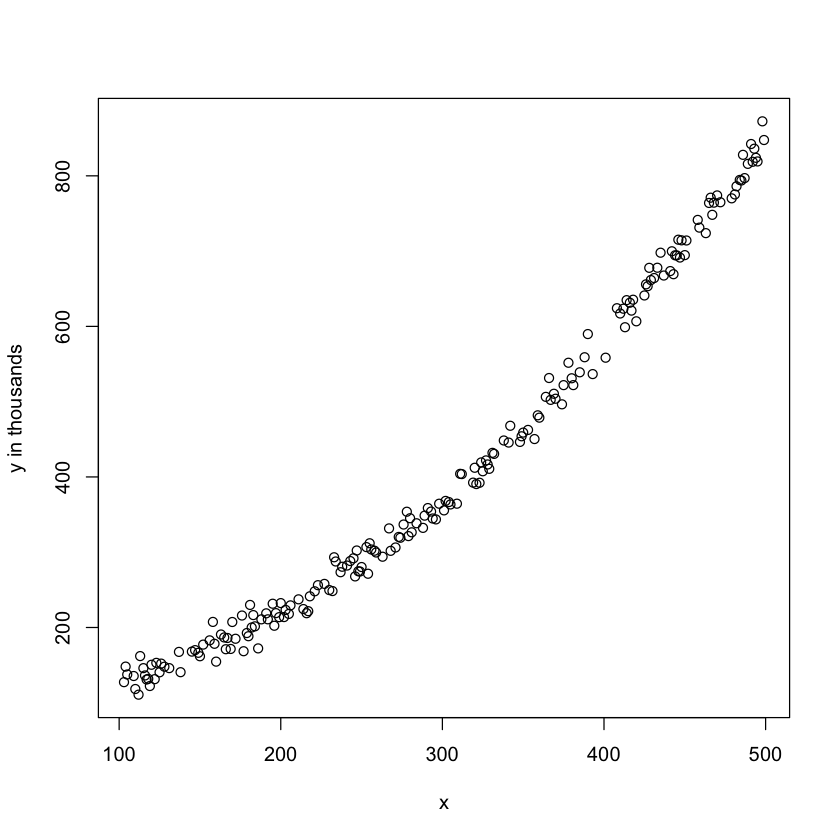

In [13]:
plot(x, noisy.y2/1e3, ylab="y in thousands")

In [19]:
png(filename="x-y2.png", height=2000, width=2000, res=400)
plot(x, noisy.y2/1e3, ylab="y (thousands)")
dev.off()

pdf 
  2

In [15]:
y3 <- 5*(x**3) + .4*(x**2) + 1

In [16]:
noise3 <- rnorm(length(x), mean=1e8, sd=1.8e7)

In [17]:
noisy.y3 <- y3 + noise3

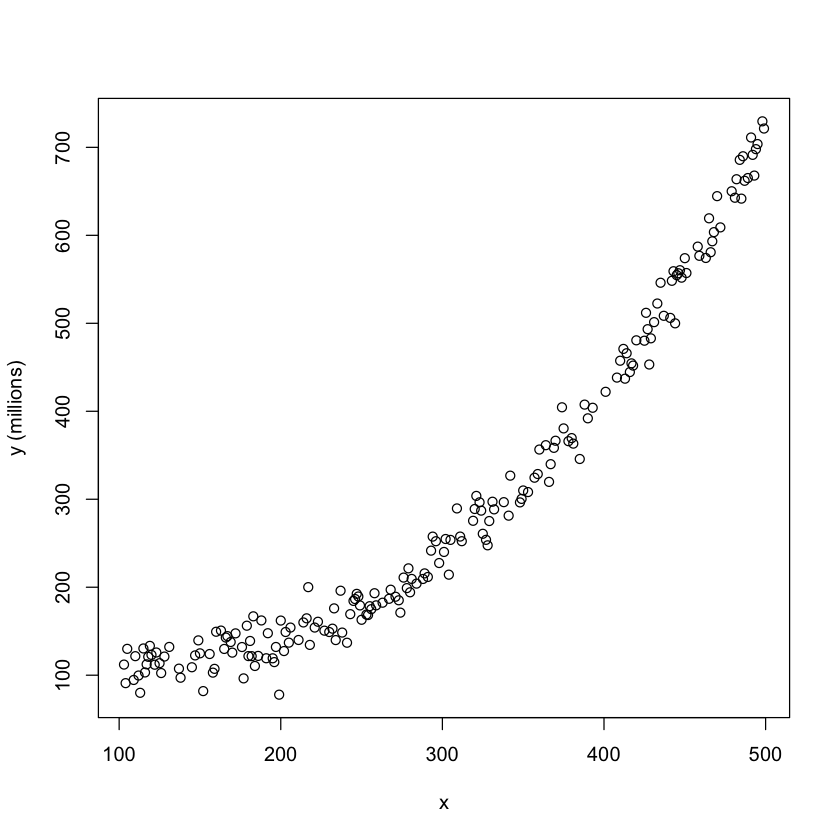

In [18]:
plot(x, noisy.y3/1e6, ylab="y (millions)")

In [20]:
png(filename="x-y3.png", height=2000, width=2000, res=400)
plot(x, noisy.y3/1e6, ylab="y (millions)")
dev.off()

pdf 
  2

In [21]:
logy <- .8*log(x)+8

In [22]:
noise_log <- rnorm(length(x), mean=0, sd=.1)

In [23]:
noisy.logy <- logy + noise_log

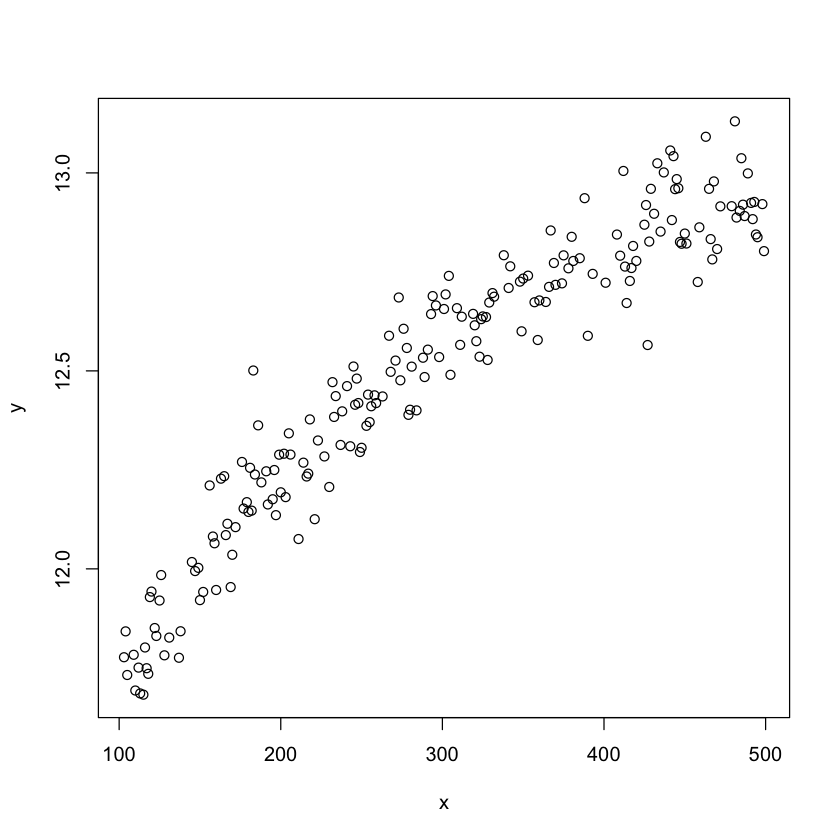

In [117]:
plot(x,noisy.logy, ylab="y")

In [118]:
png(filename="x-logy.png", height=2000, width=2000, res=400)
plot(x,noisy.logy, ylab="y")
dev.off()

pdf 
  2

In [27]:
sqy <- .7*sqrt(x) + 14

In [28]:
noise_sqy <- rnorm(length(x), mean=0, sd=1)

In [29]:
noisy.sqy <- sqy + noise_sqy

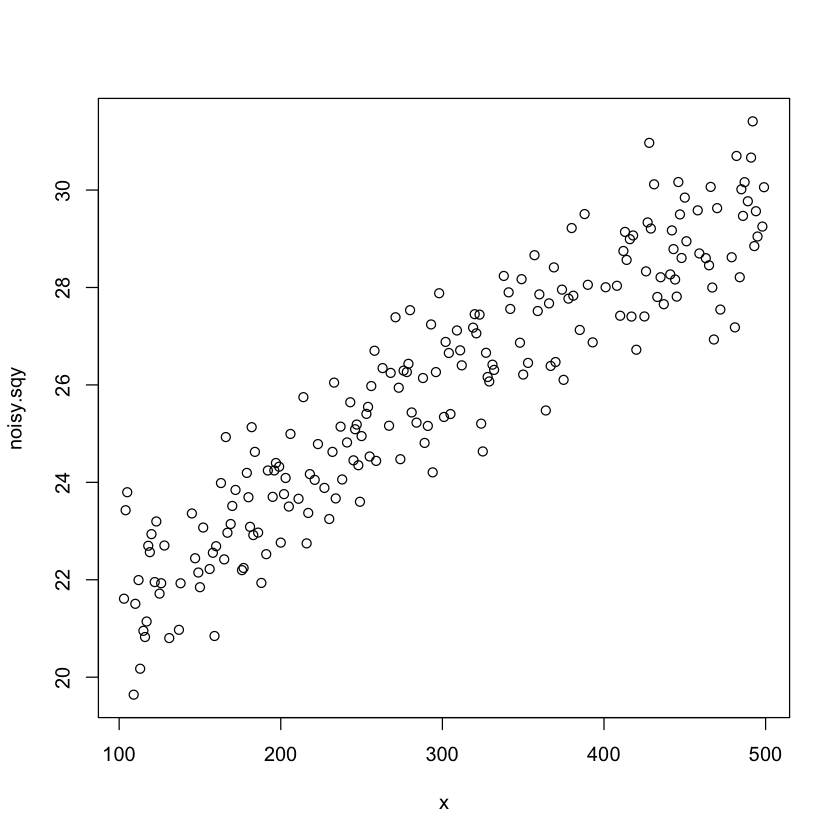

In [120]:
plot(x, noisy.sqy)

In [119]:
png(filename="x-sqy.png", height=2000, width=2000, res=400)
plot(x, noisy.sqy, ylab="y")
dev.off()

pdf 
  2

We put the data in a dataframe

In [32]:
one_var <- data.frame(x, noisy.y1, noisy.y2, noisy.y3, noisy.logy, noisy.sqy)

In [33]:
print(xtable(round(head(one_var[order(one_var$x),]),3)),include.rownames=FALSE,)

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Sun Oct 18 17:53:37 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
x & noisy.y1 & noisy.y2 & noisy.y3 & noisy.logy & noisy.sqy \\ 
  \hline
103.00 & 481.10 & 127372.77 & 112075025.75 & 11.78 & 21.61 \\ 
  104.00 & 451.14 & 148056.62 & 90963451.34 & 11.84 & 23.43 \\ 
  105.00 & 614.70 & 137575.08 & 129960611.26 & 11.73 & 23.80 \\ 
  109.00 & 601.88 & 135537.58 & 94598979.05 & 11.78 & 19.64 \\ 
  110.00 & 611.29 & 118270.35 & 121634806.71 & 11.69 & 21.51 \\ 
  112.00 & 531.72 & 110758.23 & 99643078.53 & 11.75 & 21.99 \\ 
   \hline
\end{tabular}
\end{table}


*********
For each column (each distinct $y$) we calculate $\lambda$

In [34]:
lambdas <- numeric()

In [35]:
for (i in 2:6){
    lambdas <- c(lambdas, choose_lambda(one_var[,1], one_var[,i]))
}

In [36]:
print(lambdas)

[1]  1.04  0.29  0.00 10.00  1.85


Creamos otro df con los datos transformados

In [37]:
one_var_tukey <- one_var

one_var_tukey[,2] <- one_var_tukey[,2]**lambdas[1]

one_var_tukey[,3] <- one_var_tukey[,3]**lambdas[2]

one_var_tukey[,4] <- log(one_var_tukey[,4])

one_var_tukey[,5] <- one_var_tukey[,5]**lambdas[4]

one_var_tukey[,6] <- one_var_tukey[,6]**lambdas[5]

Generamos los modelos y ploteamos $y = x^{(1/\lambda)}$ (o parecido, depende si $\lambda > 0$ o no)

In [38]:
fit1 <- lm(one_var_tukey[,2] ~ one_var_tukey[,1])
fit2 <- lm(one_var_tukey[,3] ~ one_var_tukey[,1])
fit3 <- lm(one_var_tukey[,4] ~ one_var_tukey[,1])
fitlog <- lm(one_var_tukey[,5] ~ one_var_tukey[,1])
fitsq <- lm(one_var_tukey[,6] ~ one_var_tukey[,1])

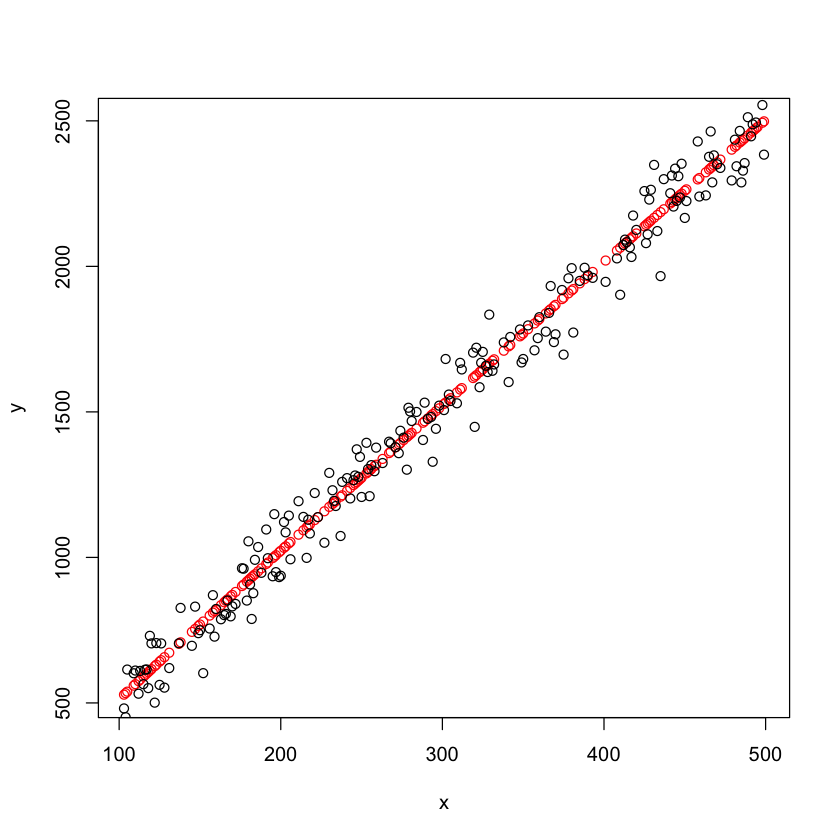

In [122]:
plot(x, (fit1$coefficients[1] + fit1$coefficients[2]*x)**(1/lambdas[1]), ylab="y", col="red")
points(x, noisy.y1)

In [123]:
png(filename="fit_x_y1.png", height=2000, width=2000, res=400)
plot(x, (fit1$coefficients[1] + fit1$coefficients[2]*x)**(1/lambdas[1]), ylab="y", col="red")
points(x, noisy.y1)
dev.off()

pdf 
  2

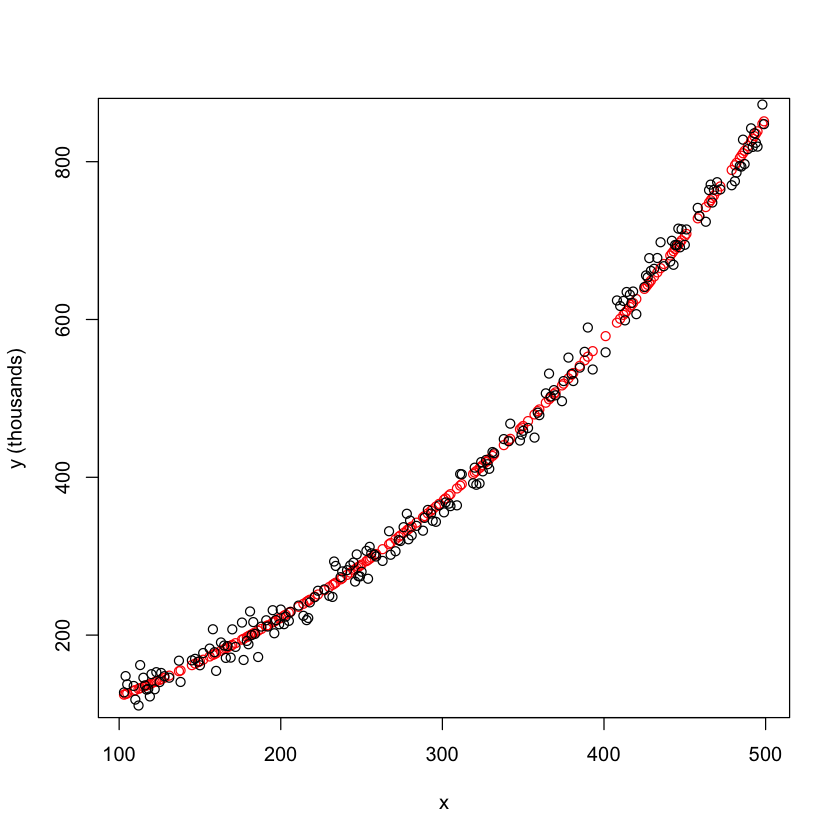

In [45]:
plot(x, (1/1e3)*(fit2$coefficients[1] + fit2$coefficients[2]*x)**(1/lambdas[2]), col="red", ylab="y (thousands)")
points(x, (1/1e3)*noisy.y2)

In [46]:
png(filename="fit_x_y2.png", height=2000, width=2000, res=400)
plot(x, (1/1e3)*(fit2$coefficients[1] + fit2$coefficients[2]*x)**(1/lambdas[2]), col="red", ylab="y (thousands)")
points(x, (1/1e3)*noisy.y2)
dev.off()

pdf 
  2

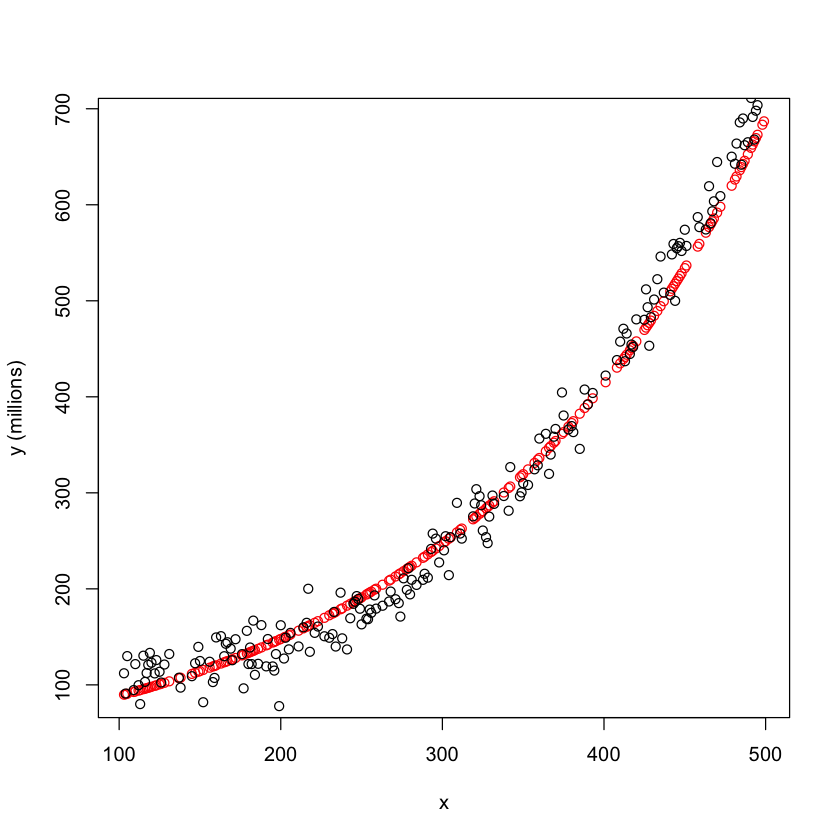

In [48]:
plot(x, (1/1e6)*exp(fit3$coefficients[1] + fit3$coefficients[2]*x), col="red", ylab="y (millions)")
points(x, noisy.y3/1e6)

In [51]:
png(filename="fit_x_y3.png", height=2000, width=2000, res=400)
plot(x, (1/1e6)*exp(fit3$coefficients[1] + fit3$coefficients[2]*x), col="red", ylab="y (millions)")
points(x, noisy.y3/1e6)
dev.off()

pdf 
  2

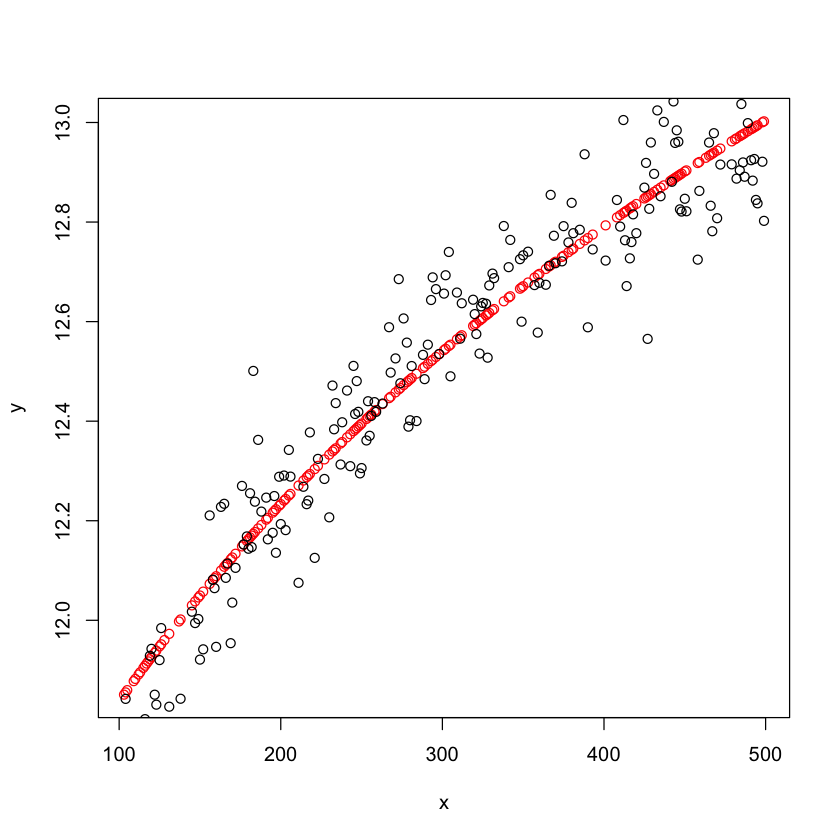

In [124]:
plot(x, (fitlog$coefficients[1] + fitlog$coefficients[2]*x)**(1/lambdas[4]), col="red", ylab="y")
points(x, noisy.logy)

In [125]:
png(filename="fit_x_log.png", height=2000, width=2000, res=400)
plot(x, (fitlog$coefficients[1] + fitlog$coefficients[2]*x)**(1/lambdas[4]), col="red", ylab="y")
points(x, noisy.logy)
dev.off()

pdf 
  2

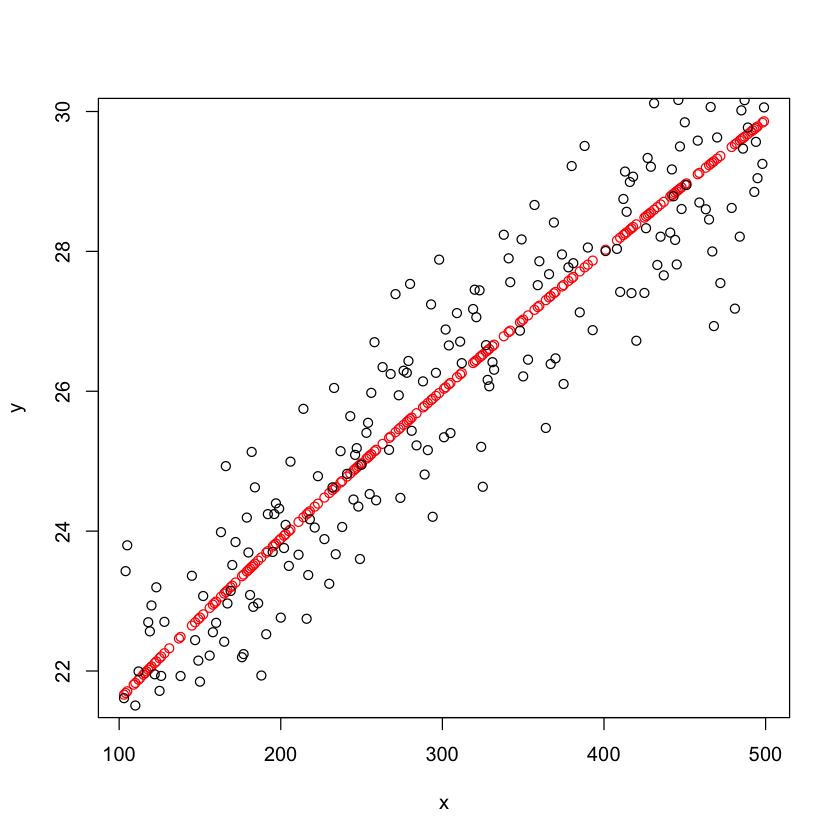

In [126]:
plot(x, (fitsq$coefficients[1] + fitsq$coefficients[2]*x)**(1/lambdas[5]), col="red", ylab="y")
points(x, noisy.sqy)

In [127]:
png(filename="fit_x_sq.png", height=2000, width=2000, res=400)
plot(x, (fitsq$coefficients[1] + fitsq$coefficients[2]*x)**(1/lambdas[5]), col="red", ylab="y")
points(x, noisy.sqy)
dev.off()

pdf 
  2

*************************
Multilinear

In [134]:
x1 <- sample(x = 100:500, size = 200, replace = FALSE)

x2 <- sample(x = 200:600, size = 200, replace = FALSE)

x3 <- sample(x = 100:500, size = 200, replace = FALSE)

my2 <- 3*x1 + .5*log(x2) + 5*x3

In [135]:
lm(my2 ~ x1 + log(x2) + x3)


Call:
lm(formula = my2 ~ x1 + log(x2) + x3)

Coefficients:
(Intercept)           x1      log(x2)           x3  
  2.187e-12    3.000e+00    5.000e-01    5.000e+00  


********************

In [64]:
df <- read.csv("parque_vehicular.csv")

In [114]:
print(xtable(head(df[,c(1,2)]),include.rownames=FALSE))

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Sun Oct 18 19:27:24 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & year & vehicles \\ 
  \hline
1 & 1981 & 6339836 \\ 
  2 & 1982 & 6695164 \\ 
  3 & 1983 & 6941252 \\ 
  4 & 1984 & 7305066 \\ 
  5 & 1985 & 7725623 \\ 
  6 & 1986 & 7732012 \\ 
   \hline
\end{tabular}
\end{table}


In [66]:
names(df) <- c("year", "vehicles")

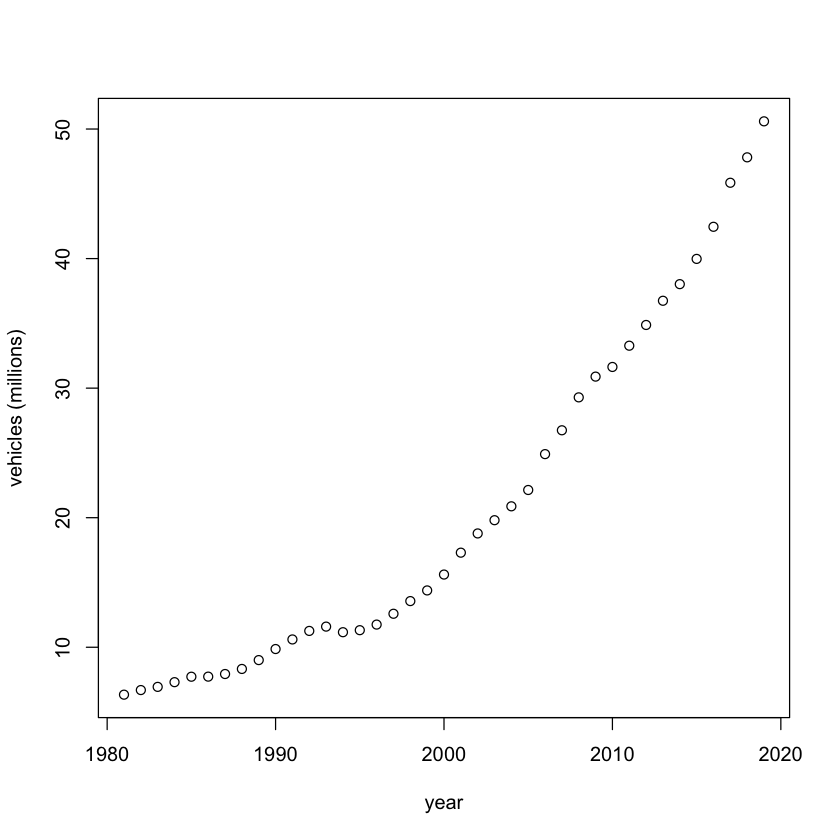

In [97]:
plot(df[,1], df[,2]/1e6, xlab="year", ylab="vehicles (millions)")

In [98]:
png(filename="vehicles_year.png", height=2000, width=2000, res=400)
plot(df[,1], df[,2]/1e6, xlab="year", ylab="vehicles (millions)")
dev.off()

pdf 
  2

In [68]:
choose_lambda(df[,1], df[,2])

[1] -0.21

In [69]:
df$y_transf <- -(df[,2]**-0.201)

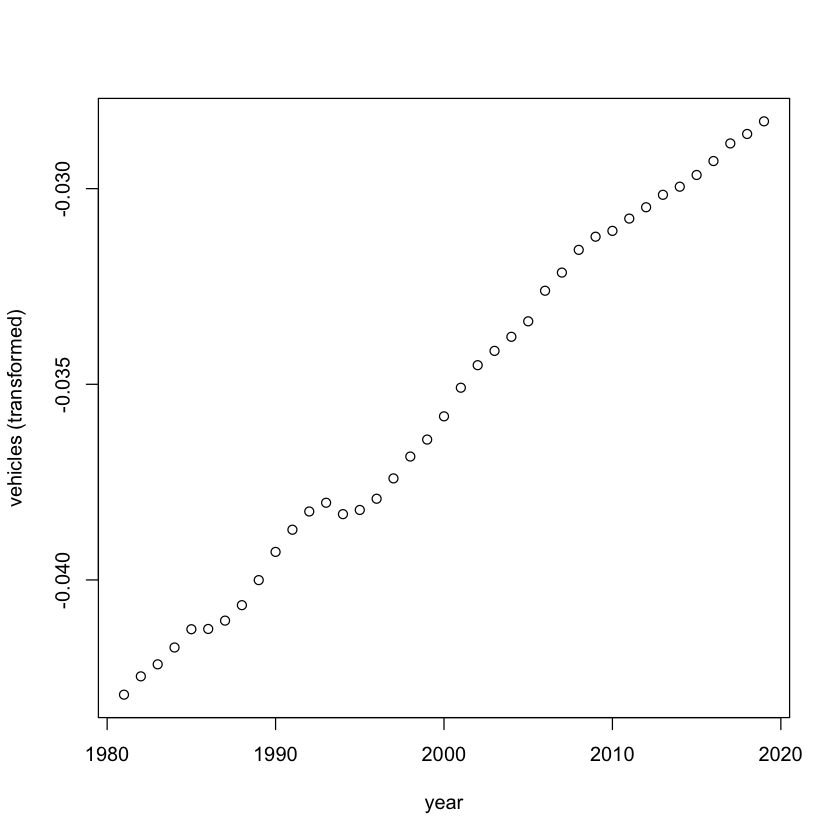

In [99]:
plot(df[,1], df[,3], xlab="year", ylab="vehicles (transformed)")

In [100]:
png(filename="vehicles_year_transformed.png", height=2000, width=2000, res=400)
plot(df[,1], df[,3], xlab="year", ylab="vehicles (transformed)")
dev.off()

pdf 
  2

In [71]:
model <- lm(df[,3] ~ df[,1])

In [72]:
coeffs <-model$coefficients

In [73]:
model


Call:
lm(formula = df[, 3] ~ df[, 1])

Coefficients:
(Intercept)      df[, 1]  
 -0.8393085    0.0004019  


In [74]:
coeffs

(Intercept)       df[, 1] 
-0.8393085484  0.0004019073

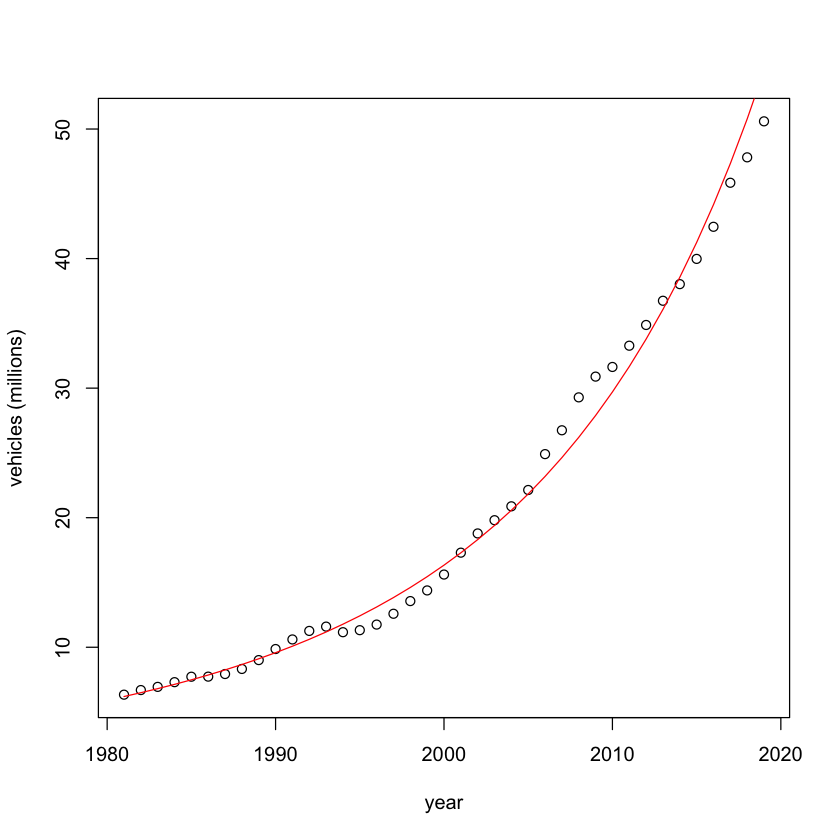

In [92]:
plot(df[,1], df[,2]/1e6, xlab="year", ylab="vehicles (millions)")
lines(df[,1], (1e-6)*(-coeffs[2]*df[,1] - coeffs[1])**(-1/0.201), col="red")

In [101]:
png(filename="fit_vehicles_year.png", height=2000, width=2000, res=400)
plot(df[,1], df[,2]/1e6, xlab="year", ylab="vehicles (millions)")
lines(df[,1], (1e-6)*(-coeffs[2]*df[,1] - coeffs[1])**(-1/0.201), col="red")
dev.off()

pdf 
  2

In [85]:
model2 <- lm(log(df[,2]) ~ df[,1])

In [86]:
model2


Call:
lm(formula = log(df[, 2]) ~ df[, 1])

Coefficients:
(Intercept)      df[, 1]  
  -97.11388      0.05688  


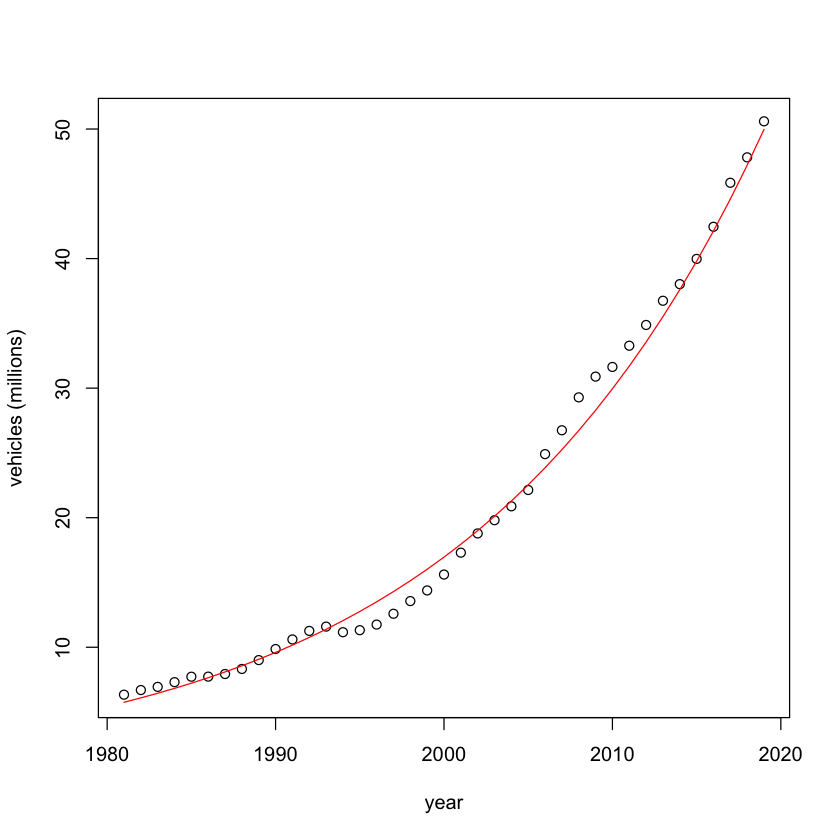

In [91]:
plot(df[,1], df[,2]/1e6, ylab="vehicles (millions)", xlab="year")
lines(df[,1], (1e-6)*exp(0.05688*df[,1] - 97.11388), col="red")

In [102]:
png(filename="fit2_vehicles_year.png", height=2000, width=2000, res=400)
plot(df[,1], df[,2]/1e6, ylab="vehicles (millions)", xlab="year")
lines(df[,1], (1e-6)*exp(0.05688*df[,1] - 97.11388), col="red")
dev.off()

pdf 
  2

In [88]:
predicted.intervals.cars <- predict(model2,data.frame(x=df[,1]),interval='confidence',
                               level=0.99)

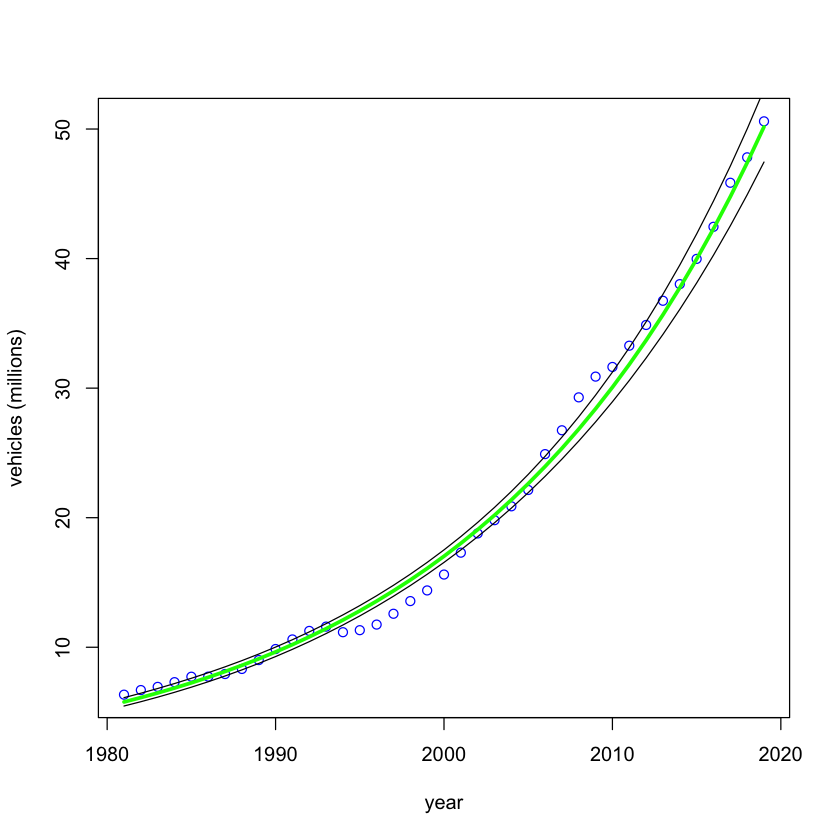

In [104]:
plot(df[,1],df[,2]/1e6,col='blue',xlab='year',ylab="vehicles (millions)")
#lines(q,y,col='firebrick1',lwd=3)
lines(df[,1],exp(predicted.intervals.cars[,1])/1e6,col='green',lwd=3)
lines(df[,1],exp(predicted.intervals.cars[,2])/1e6,col='black',lwd=1)
lines(df[,1],exp(predicted.intervals.cars[,3])/1e6,col='black',lwd=1)

In [105]:
png(filename="predicted_intervals_vehicles_year.png", height=2000, width=2000, res=400)
plot(df[,1],df[,2]/1e6,col='blue',xlab='year',ylab="vehicles (millions)")
#lines(q,y,col='firebrick1',lwd=3)
lines(df[,1],exp(predicted.intervals.cars[,1])/1e6,col='green',lwd=3)
lines(df[,1],exp(predicted.intervals.cars[,2])/1e6,col='black',lwd=1)
lines(df[,1],exp(predicted.intervals.cars[,3])/1e6,col='black',lwd=1)
dev.off()

pdf 
  2